In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing
from IPython.display import display
from datetime import  datetime, timedelta

warnings.filterwarnings('ignore')

In [2]:
champagne_data = pd.read_csv('../b. Datasets/ChampagneSales/ChampagneSales.csv')

In [3]:
champagne_data.head(2)

,Month,Sales
0,1964-01,2815
1,1964-02,2672


In [4]:
champagne_data.tail(2)

,Month,Sales
103,1972-08,1413
104,1972-09,5877


In [5]:
date_range = pd.date_range(start='1964-01', end='1972-10', freq='M')
champagne_data['Month'] = date_range
champagne_data.set_index('Month', inplace=True)

In [6]:
champagne_data.head(2)

,Sales
Month,
1964-01-31,2815
1964-02-29,2672


In [7]:
champagne_data.tail(2)

,Sales
Month,
1972-08-31,1413
1972-09-30,5877


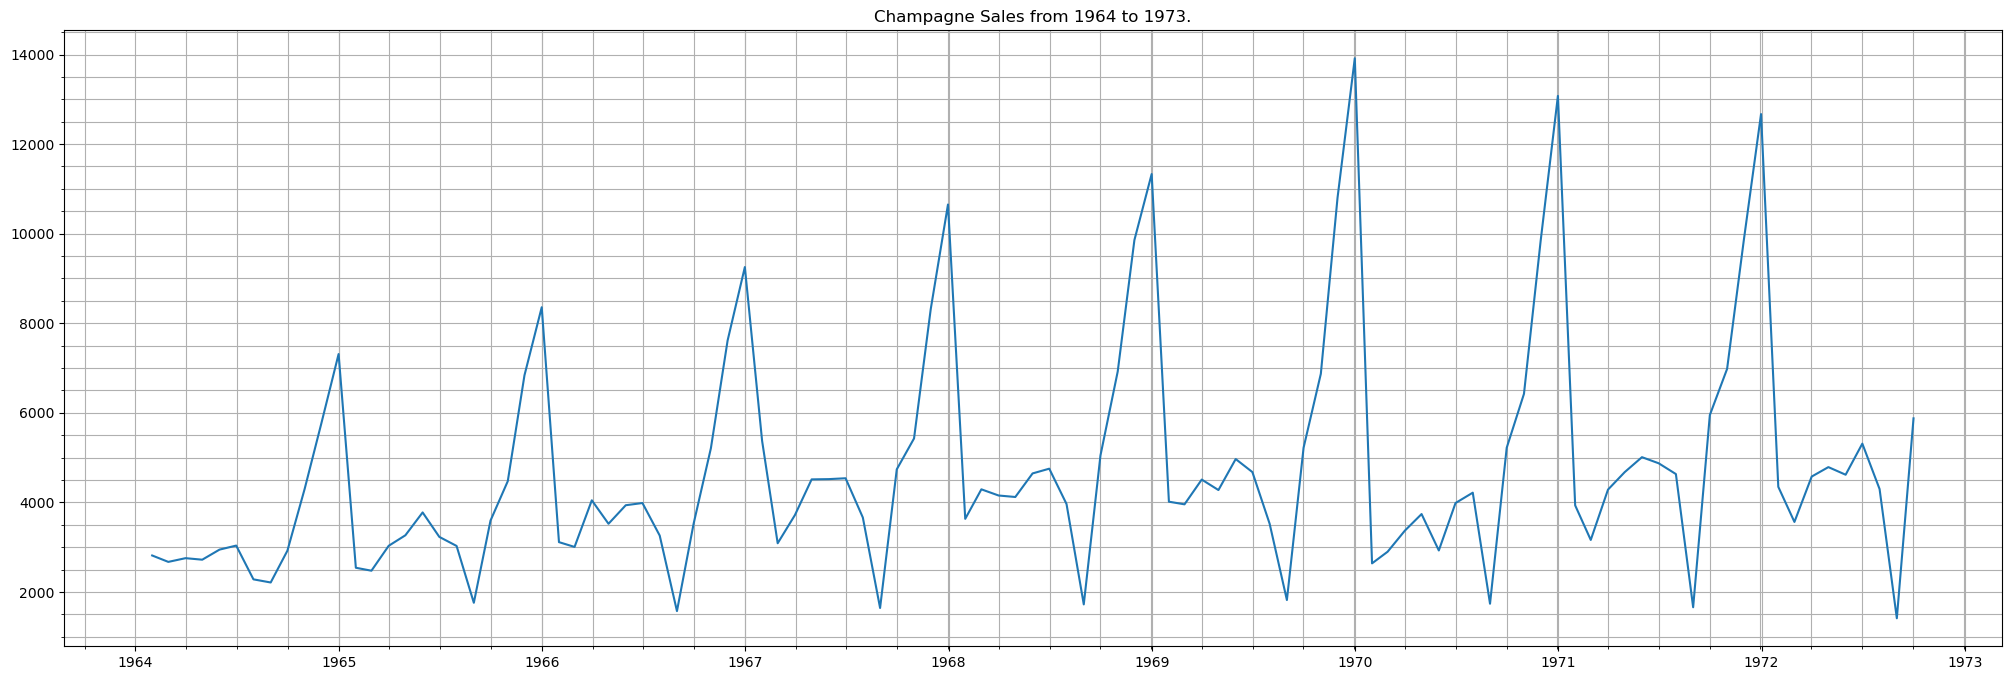

In [8]:
plt.figure(figsize=(25, 8))
plt.plot(champagne_data.index, champagne_data['Sales'])
plt.minorticks_on()
plt.grid(which='both')
plt.title('Champagne Sales from 1964 to 1973.')
plt.show()

##### From this graph, there is a clear increasing trend and a big factor of seasonality also involved.

In [9]:
train_end = datetime(1971, 9, 30)

train_data = champagne_data[:train_end]
validation_data = champagne_data[train_end + timedelta(days=1):]

In [10]:
print("Train data")
display(train_data.head(2), train_data.tail(2))

print("\n\nValidation data")
display(validation_data.head(2), validation_data.tail(2))

Train data


,Sales
Month,
1964-01-31,2815
1964-02-29,2672


,Sales
Month,
1971-08-31,1659
1971-09-30,5951




Validation data


,Sales
Month,
1971-10-31,6981
1971-11-30,9851


,Sales
Month,
1972-08-31,1413
1972-09-30,5877


In [11]:
holt_winters_add_add = ExponentialSmoothing(train_data, trend='add', seasonal='add', initialization_method='estimated')

In [12]:
holt_winters_add_add = holt_winters_add_add.fit(optimized=True)

In [13]:
holt_winters_add_add.summary()

Dep. Variable:,Sales,No. Observations:,93
Model:,ExponentialSmoothing,SSE,48401628.508
Optimized:,True,AIC,1256.107
Trend:,Additive,BIC,1296.629
Seasonal:,Additive,AICC,1265.351
Seasonal Periods:,12,Date:,"Sat, 26 Oct 2024"
Box-Cox:,False,Time:,21:28:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0759488,alpha,True
smoothing_trend,0.0001221,beta,True


In [14]:
validation_forecast_add_add = holt_winters_add_add.predict(start=validation_data.index[0], end=validation_data.index[-1])

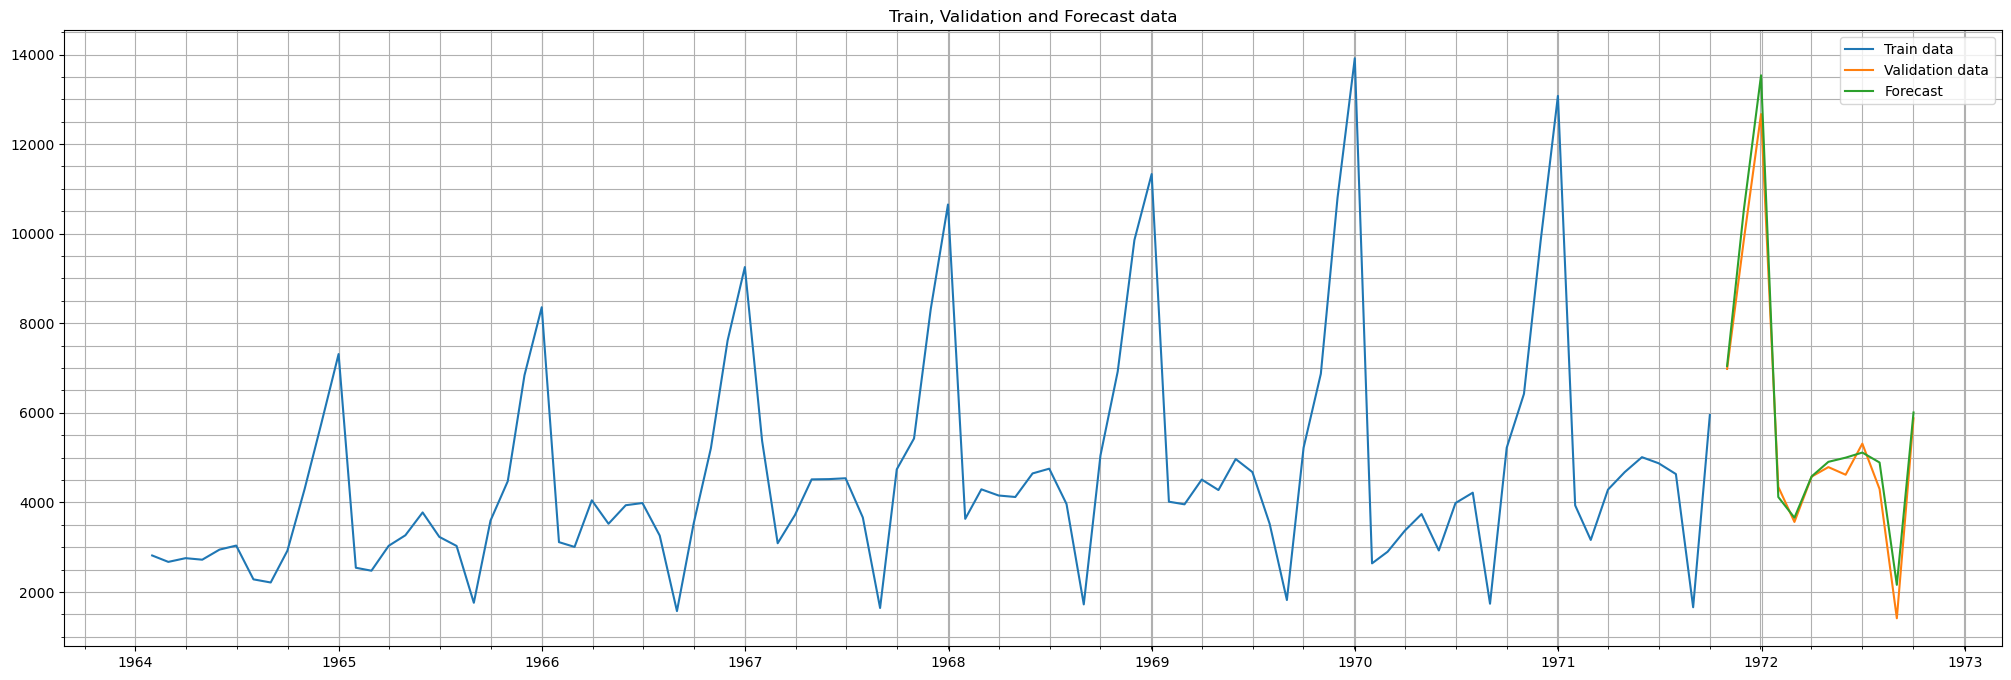

In [15]:
plt.figure(figsize=(25, 8))
plt.plot(train_data.index, train_data['Sales'], label="Train data")
plt.plot(validation_data.index, validation_data['Sales'], label="Validation data")
plt.plot(validation_data.index, validation_forecast_add_add, label="Forecast")
plt.legend()
plt.title("Train, Validation and Forecast data")
plt.minorticks_on()
plt.grid(which='both')
plt.show()

In [16]:
forecast_add_add_rmse = mean_squared_error(validation_data['Sales'], validation_forecast_add_add, squared=False)
forecast_add_add_rmse

446.5169558532491

##### Although the RMSE may seem high, the sales that are dealt in this case is in the thousands. 
##### Let's try to determine the mean absolute percentage error to better understand the results.

In [17]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

MAPE(validation_data['Sales'], validation_forecast_add_add)

8.827818397717033

##### MAPE below 10% is often deemed accurate and reliable. 
##### Now, we've determined the model, we can forecast the data for the next year.

In [18]:
holt_winters_forecast = ExponentialSmoothing(champagne_data, trend='add', seasonal='add', initialization_method='estimated')

In [19]:
holt_winters_forecast = holt_winters_forecast.fit(optimized=True)

In [20]:
holt_winters_forecast.summary()

Dep. Variable:,Sales,No. Observations:,105
Model:,ExponentialSmoothing,SSE,50431691.538
Optimized:,True,AIC,1405.628
Trend:,Additive,BIC,1448.091
Seasonal:,Additive,AICC,1413.581
Seasonal Periods:,12,Date:,"Sat, 26 Oct 2024"
Box-Cox:,False,Time:,21:28:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757938,alpha,True
smoothing_trend,0.0001066,beta,True


In [21]:
forecast = holt_winters_forecast.forecast(len(validation_data))

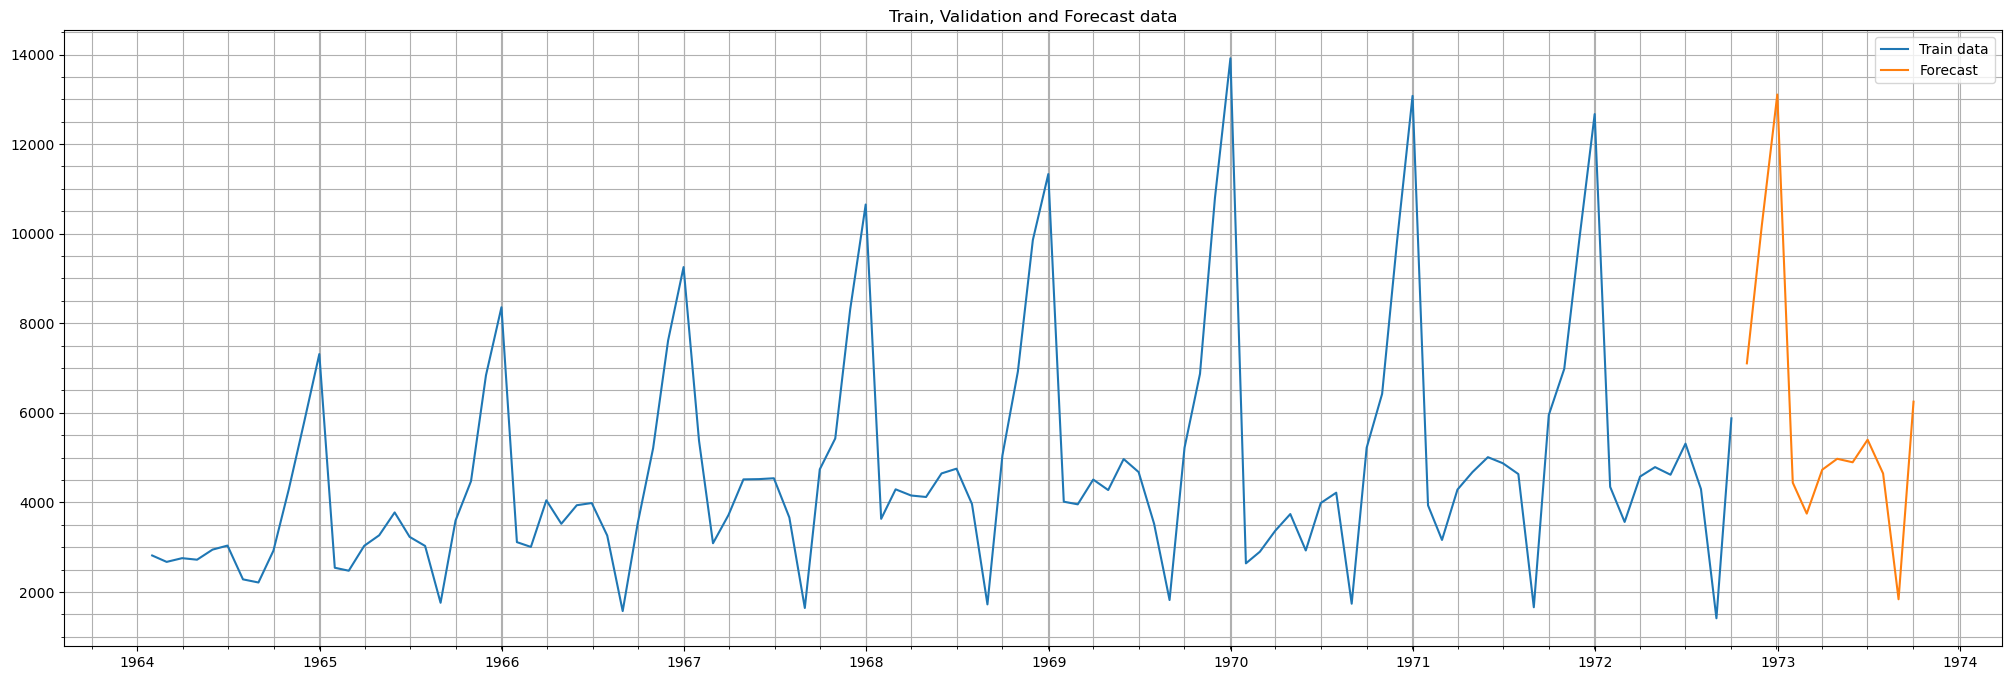

In [22]:
plt.figure(figsize=(25, 8))
plt.plot(champagne_data.index, champagne_data['Sales'], label="Train data")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.title("Train, Validation and Forecast data")
plt.minorticks_on()
plt.grid(which='both')
plt.show()

In [23]:
date_range = pd.date_range(start='1972-10-30', end='1973-10-30', freq='M')
submission_dataframe = pd.DataFrame({
    'Month': date_range,
    'Sales': forecast
})

In [24]:
submission_dataframe_file = '../d. Output Files/ChampagneSales/' + 'ChampagneSales.csv'
print(f"File name: {submission_dataframe_file.split('/')[3]}")
submission_dataframe.to_csv(submission_dataframe_file, index=False)

File name: ChampagneSales.csv
